## Cleaning Data

In [1]:
#importing required libaries
import streamlit as st
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#getting dataset
def get_data():
    url = './dataset/africa_food_prices.csv'
    df = pd.read_csv(url)
    return df
df = get_data()

In [3]:
# data structure
df.shape

(956779, 19)

In [4]:
# data information and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

In [5]:
# statistical details of the dataset
df.describe()

,Unnamed: 0,country_id,state_id,market_id,produce_id,currency_id,pt_id,um_unit_id,month,year,price,mp_commoditysource
count,9.567790e+05,956779.000000,956779.000000,956779.000000,956779.000000,956779.0,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05,0.0
mean,1.076345e+06,1961.192782,22287.911831,1392.594222,186.141214,0.0,14.926716,14.017183,6.381471,2015.704015,4.128833e+03,NaN
std,5.159597e+05,10404.034921,98565.608270,1027.751212,165.401303,0.0,0.263570,24.437728,3.418025,4.603829,1.381840e+05,NaN
min,1.542700e+04,4.000000,0.000000,101.000000,50.000000,0.0,14.000000,5.000000,1.000000,1990.000000,0.000000e+00,NaN
25%,5.939185e+05,90.000000,1836.000000,528.000000,67.000000,0.0,15.000000,5.000000,3.000000,2013.000000,6.500000e+01,NaN
50%,1.113054e+06,155.000000,2209.000000,1078.000000,105.000000,0.0,15.000000,5.000000,6.000000,2017.000000,2.505714e+02,NaN
75%,1.513290e+06,205.000000,21971.000000,2281.000000,262.000000,0.0,15.000000,9.000000,9.000000,2020.000000,7.221005e+02,NaN
max,2.050637e+06,70001.000000,900003.000000,6081.000000,887.000000,0.0,17.000000,175.000000,12.000000,2021.000000,1.725000e+07,NaN


In [6]:
# drop cols we dont need 
all_cols = ['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource']

cols_to_drop = ['Unnamed: 0','mp_commoditysource']

df = df.drop(columns=cols_to_drop)

In [7]:
# rename the cols 
new_names = {    
    'pt_id':'market_type_id',
    'um_unit_id':'measurement_id',
    'market':'town',
    'market_id':'town_id',
    }

df = df.rename(columns= new_names)

## Pivot Tables

In [8]:
# aggregating data using pivot tables 
table = pd.pivot_table(df, index=["country","market_type","year"],
                      values=["price"], aggfunc='mean')

In [9]:
table = pd.pivot_table(df, index=["state","market_type","year"],
                      values=["price"], aggfunc='sum')

In [10]:
#summing all null values
df.isnull().sum()

country_id             0
country                0
state_id               0
state             126678
town_id                0
town                   0
produce_id             0
produce                0
currency_id            0
currency               0
market_type_id         0
market_type            0
measurement_id         0
quantity               0
month                  0
year                   0
price                  0
dtype: int64

In [11]:
#filtering within the pivot table 
table.query("state == ['Alger']") 

price
state market_type year         
Alger Retail      2015  27013.2
                  2016  20577.0

In [12]:
# converting the pivot table back to a DataFrame 
df2 = table.reset_index()

In [13]:
#getting the mean using pivot table
pvt = pd.pivot_table(df, index=['state','market_type','produce','year'],
                    values=['price'], aggfunc='mean')
pvt

price
state market_type produce        year            
Abia  Retail      Bread - Retail 2014  239.212500
                                 2015  247.521458
                                 2016  182.228000
                                 2017  150.250000
                                 2021  100.000000
...                                           ...
Zou   Retail      Yam - Retail   2016  250.000000
                                 2018  279.166667
                                 2019  234.966665
                                 2020  228.618794
                                 2021  287.583333

[35736 rows x 1 columns]

In [14]:
# conert to dataframe
pvt_df = pvt.reset_index() 

In [15]:
#filtering data based on state
pvt_df[pvt_df['state'] == 'Abia']

,state,market_type,produce,year,price
0,Abia,Retail,Bread - Retail,2014,239.212500
1,Abia,Retail,Bread - Retail,2015,247.521458
2,Abia,Retail,Bread - Retail,2016,182.228000
3,Abia,Retail,Bread - Retail,2017,150.250000
4,Abia,Retail,Bread - Retail,2021,100.000000
...,...,...,...,...,...
57,Abia,Wholesale,Sorghum (brown) - Wholesale,2021,36953.750000
58,Abia,Wholesale,Sorghum (white) - Wholesale,2017,27385.000000
59,Abia,Wholesale,Sorghum (white) - Wholesale,2021,37558.875000
60,Abia,Wholesale,Yam - Wholesale,2017,45040.000000


<AxesSubplot:>

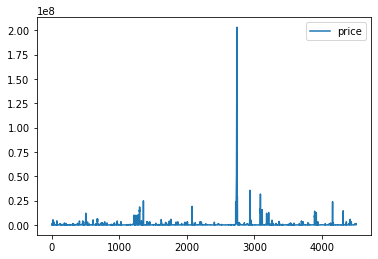

In [16]:
#line chat based on the price per state
df2[['state','price']].plot(kind='line')

In [27]:
df.columns

Index(['country_id', 'country', 'state_id', 'state', 'town_id', 'town',
       'produce_id', 'produce', 'currency_id', 'currency', 'market_type_id',
       'market_type', 'measurement_id', 'quantity', 'month', 'year', 'price'],
      dtype='object')

<AxesSubplot:>

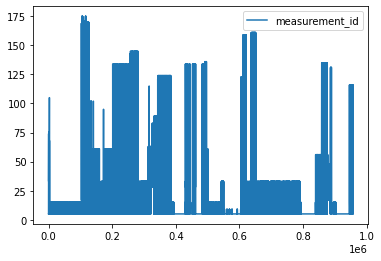

In [29]:
#line chat based on the measurement of product per country
df[['country','measurement_id']].plot(kind='line')

In [17]:
#number of sales based on the type of market
market_type = df.market_type.value_counts()

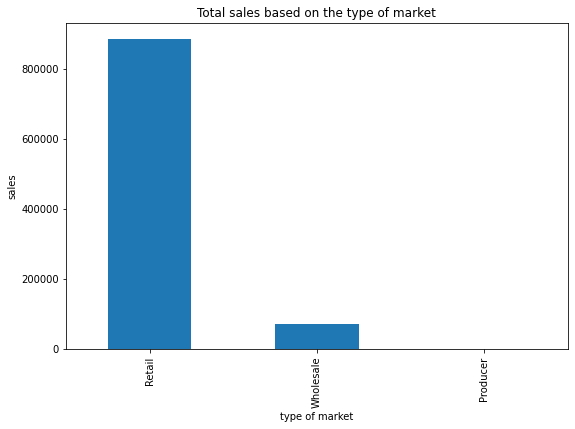

In [18]:
#bar chart to show the sales based on the type of market
market_type.plot(kind='bar', figsize=(9, 6))
plt.title('Total sales based on the type of market')
plt.xlabel('type of market')
plt.ylabel('sales')
plt.show()

In [19]:
#most 3 purchased commodity based on country and quantity
most_purchased = df.sort_values(['measurement_id', 'price'], ascending= False)[['produce','country','quantity','price']]

In [21]:
# number of sales per year
year_count = df.year.value_counts()

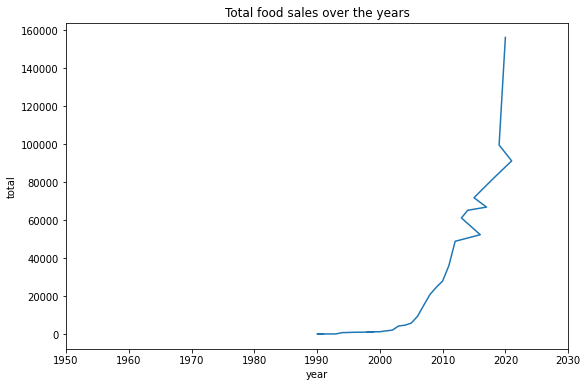

In [24]:
#line graph to visualize the result
year_count.plot(kind='line', figsize=(9, 6))
plt.title('Total food sales over the years')
plt.xlim(1950, 2030)
plt.xlabel('year')
plt.ylabel('total')
plt.show()

## Diagnosis

 from my anaalysis I figured out Rwanda had the most sales of commodity, millet was the most bought commodity and year 2020 was the highest rate of bought commodity.